In [1]:
using JuliaDB, Plots, StatsPlots

┌ Info: Recompiling stale cache file C:\Users\lucy_\.julia\compiled\v1.1\JuliaDB\4FA8g.ji for JuliaDB [a93385a2-3734-596a-9a66-3cfbb77141e6]
└ @ Base loading.jl:1184
┌ Info: Recompiling stale cache file C:\Users\lucy_\.julia\compiled\v1.1\StatsPlots\SiylL.ji for StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd]
└ @ Base loading.jl:1184


IC for diffusion : 2/sqrt(2*pi*75*3600)*exp(-Yg^2/(2*75*3600))

In [48]:
t = loadtable("c_square.csv")
t = filter(row->row[1]==0,t)
t = sort(t,:y);

In [64]:
function trapzs(x,y)
    r = 0
    for (i,xs) in enumerate(x[2:end])
        r += (x[i+1] - x[i])*(y[i+1]+y[i])
    end
    return r/2
end

MSD = []
for i = 3:32
    append!(MSD,trapzs(select(t,2),select(t,i).*select(t,2).^2))
end

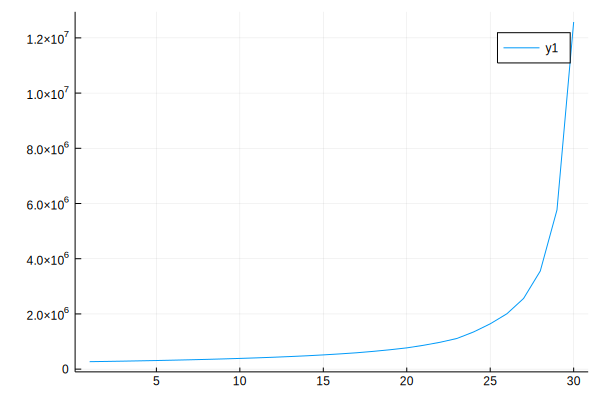

In [65]:
plot(MSD)

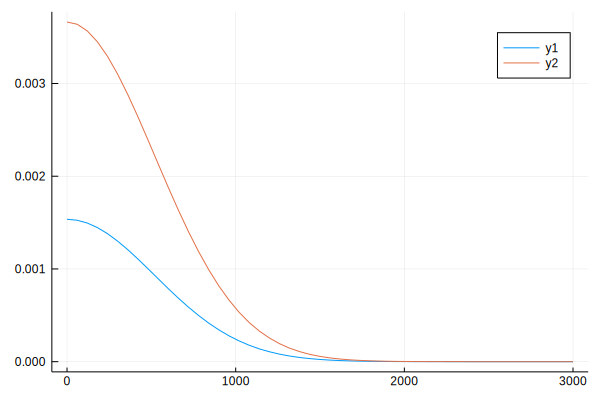

In [66]:
@df t plot(cols(2),cols(3))
@df t plot!(cols(2),cols(20))